In [224]:
import pandas as pd

In [225]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Age of the house the moment it was sold Vs it price

In [226]:
df_ = df[df['yr_renovated']==0][['id','yr_built','date','price','yr_renovated']].copy()

def get_age(end_year, start_year):
    if start_year ==0:
        return 'n/a'
    return end_year - start_year


df_['age (sold - built)'] = df_.apply(lambda row: get_age(
    pd.to_datetime(row['date']).year, row['yr_built']), axis=1)


df_

,id,yr_built,date,price,yr_renovated,age (sold - built)
0,7129300520,1955,20141013T000000,221900.0,0,59
2,5631500400,1933,20150225T000000,180000.0,0,82
3,2487200875,1965,20141209T000000,604000.0,0,49
4,1954400510,1987,20150218T000000,510000.0,0,28
5,7237550310,2001,20140512T000000,1230000.0,0,13
...,...,...,...,...,...,...
21608,263000018,2009,20140521T000000,360000.0,0,5
21609,6600060120,2014,20150223T000000,400000.0,0,1
21610,1523300141,2009,20140623T000000,402101.0,0,5
21611,291310100,2004,20150116T000000,400000.0,0,11


In [227]:
df_['age (sold - built)'].value_counts()

age (sold - built)
 9      473
 8      443
 11     432
 0      430
 10     428
       ... 
 113     27
 115     21
 81      16
 80      12
-1       12
Name: count, Length: 117, dtype: int64

In [228]:
df_[df_['age (sold - built)']<0].sort_values('date')

,id,yr_built,date,price,yr_renovated,age (sold - built)
21372,6169901185,2015,20140520T000000,490000.0,0,-1
17098,9126100346,2015,20140617T000000,350000.0,0,-1
8039,1250200495,2015,20140624T000000,455000.0,0,-1
1763,1832100030,2015,20140625T000000,597326.0,0,-1
20852,1257201420,2015,20140709T000000,595000.0,0,-1
20963,6058600220,2015,20140731T000000,230000.0,0,-1
19805,9126100765,2015,20140801T000000,455000.0,0,-1
14489,2770601530,2015,20140826T000000,500000.0,0,-1
20770,9310300160,2015,20140828T000000,357000.0,0,-1
2687,3076500830,2015,20141029T000000,385195.0,0,-1


In [229]:
# Replace negative age (sold - built) values by 0 to get a clean data set and avoid distortions

df_['age (sold - built)'] = df_.apply(lambda row: 0 if row['age (sold - built)']<0 else row['age (sold - built)'],axis=1)


In [230]:
df_ages_intervals = pd.cut(df_['age (sold - built)'], bins=10)

df_agg = df_.groupby(df_ages_intervals)[['price']].agg(['min', 'mean', 'max'])
df_agg


price                          
                         min           mean        max
age (sold - built)                                    
(-0.115, 11.5]      155000.0  608240.557356  5350000.0
(11.5, 23.0]        154000.0  608206.377386  6890000.0
(23.0, 34.5]        115000.0  531732.727665  5300000.0
(34.5, 46.0]         89000.0  474720.119958  3800000.0
(46.0, 57.5]         75000.0  447525.569588  3070000.0
(57.5, 69.0]         82000.0  457169.313086  3400000.0
(69.0, 80.5]         78000.0  446264.874046  3650000.0
(80.5, 92.0]        105500.0  595739.866543  3000000.0
(92.0, 103.5]        80000.0  542975.354223  2500000.0
(103.5, 115.0]       90000.0  609218.365243  3300000.0

In [231]:
[df['date'].min(),df['date'].max()]

['20140502T000000', '20150527T000000']

<Axes: title={'center': 'Relationship between house price and its age'}, xlabel='age (sold - built)'>

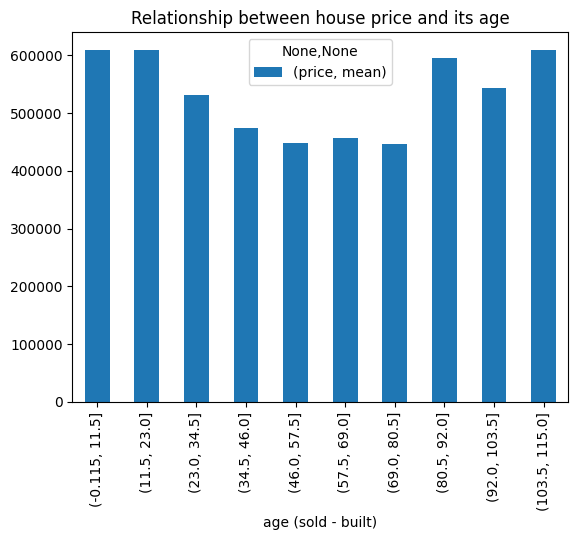

In [232]:
import matplotlib

df_agg.reset_index(inplace=True)

df_agg.plot.bar(x='age (sold - built)', y=('price','mean'),title="Relationship between house price and its age")

### bedrooms vs dimensional specs

In [233]:
#get an idea of how frequently each bedrooms value occured in the data set
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [234]:
#narrow the columns and select the ones that we are only concerned about

df_ = df[['id','bedrooms','sqft_living','sqft_lot','floors']].copy()
df_

,id,bedrooms,sqft_living,sqft_lot,floors
0,7129300520,3,1180,5650,1.0
1,6414100192,3,2570,7242,2.0
2,5631500400,2,770,10000,1.0
3,2487200875,4,1960,5000,1.0
4,1954400510,3,1680,8080,1.0
...,...,...,...,...,...
21608,263000018,3,1530,1131,3.0
21609,6600060120,4,2310,5813,2.0
21610,1523300141,2,1020,1350,2.0
21611,291310100,3,1600,2388,2.0


In [235]:
# Divide bedrooms variable into 20 intervals.

df_bedrooms_intervals = pd.cut(df_['bedrooms'], bins=20)

df_bedrooms_count = df_bedrooms_intervals.value_counts()
df_bedrooms_count

bedrooms
(1.65, 3.3]       12584
(3.3, 4.95]        6882
(4.95, 6.6]        1873
(-0.033, 1.65]      212
(6.6, 8.25]          51
(8.25, 9.9]           6
(9.9, 11.55]          4
(31.35, 33.0]         1
(13.2, 14.85]         0
(14.85, 16.5]         0
(11.55, 13.2]         0
(18.15, 19.8]         0
(19.8, 21.45]         0
(21.45, 23.1]         0
(23.1, 24.75]         0
(24.75, 26.4]         0
(26.4, 28.05]         0
(28.05, 29.7]         0
(29.7, 31.35]         0
(16.5, 18.15]         0
Name: count, dtype: int64

In [236]:
df_agg = df_.groupby(df_bedrooms_intervals)[['sqft_living','sqft_lot','floors']].agg(['min', 'mean', 'max']).round(1)
df_agg

sqft_living                  sqft_lot                      \
                       min    mean      max      min     mean        max   
bedrooms                                                                   
(-0.033, 1.65]       290.0   935.1   4810.0    638.0  16767.4   533610.0   
(1.65, 3.3]          440.0  1681.7   6840.0    572.0  13906.4  1164794.0   
(3.3, 4.95]          800.0  2554.6   7850.0    520.0  16720.8  1651359.0   
(4.95, 6.6]         1120.0  3081.9  12050.0   1989.0  17033.0  1074218.0   
(6.6, 8.25]         1940.0  3929.8  13540.0   2400.0  17815.1   307752.0   
(8.25, 9.9]         2820.0  3775.0   4620.0   4400.0   5480.0     6988.0   
(9.9, 11.55]        2920.0  3530.0   4590.0   3745.0   7884.8    11914.0   
(11.55, 13.2]          NaN     NaN      NaN      NaN      NaN        NaN   
(13.2, 14.85]          NaN     NaN      NaN      NaN      NaN        NaN   
(14.85, 16.5]          NaN     NaN      NaN      NaN      NaN        NaN   
(16.5, 18.15]          NaN     NaN      NaN      NaN      NaN        NaN   
(18.15, 19.8]          NaN     NaN      NaN      NaN      NaN        NaN   
(19.8, 21.45]          NaN     NaN      NaN      NaN      NaN        NaN   
(21.45, 23.1]          NaN     NaN      NaN      NaN      NaN        NaN   
(23.1, 24.75]          NaN     NaN      NaN      NaN      NaN        NaN   
(24.75, 26.4]          NaN     NaN      NaN      NaN      NaN        NaN   
(26.4, 28.05]          NaN     NaN      NaN      NaN      NaN        NaN   
(28.05, 29.7]          NaN     NaN      NaN      NaN      NaN        NaN   
(29.7, 31.35]          NaN     NaN      NaN      NaN      NaN        NaN   
(31.35, 33.0]       1620.0  1620.0   1620.0   6000.0   6000.0     6000.0   

               floors            
                  min mean  max  
bedrooms                         
(-0.033, 1.65]    1.0  1.2  3.5  
(1.65, 3.3]       1.0  1.4  3.5  
(3.3, 4.95]       1.0  1.6  3.0  
(4.95, 6.6]       1.0  1.6  3.0  
(6.6, 8.25]       1.0  1.7  3.5  
(8.25, 9.9]       2.0  2.2  2.5  
(9.9, 11.55]      1.0  1.8  2.0  
(11.55, 13.2]     NaN  NaN  NaN  
(13.2, 14.85]     NaN  NaN  NaN  
(14.85, 16.5]     NaN  NaN  NaN  
(16.5, 18.15]     NaN  NaN  NaN  
(18.15, 19.8]     NaN  NaN  NaN  
(19.8, 21.45]     NaN  NaN  NaN  
(21.45, 23.1]     NaN  NaN  NaN  
(23.1, 24.75]     NaN  NaN  NaN  
(24.75, 26.4]     NaN  NaN  NaN  
(26.4, 28.05]     NaN  NaN  NaN  
(28.05, 29.7]     NaN  NaN  NaN  
(29.7, 31.35]     NaN  NaN  NaN  
(31.35, 33.0]     1.0  1.0  1.0

In [237]:
# Cleaning the data

df_agg.dropna(inplace=True)
df_agg.reset_index(inplace=True)
df_agg


bedrooms sqft_living                  sqft_lot                      \
                          min    mean      max      min     mean        max   
0  (-0.033, 1.65]       290.0   935.1   4810.0    638.0  16767.4   533610.0   
1     (1.65, 3.3]       440.0  1681.7   6840.0    572.0  13906.4  1164794.0   
2     (3.3, 4.95]       800.0  2554.6   7850.0    520.0  16720.8  1651359.0   
3     (4.95, 6.6]      1120.0  3081.9  12050.0   1989.0  17033.0  1074218.0   
4     (6.6, 8.25]      1940.0  3929.8  13540.0   2400.0  17815.1   307752.0   
5     (8.25, 9.9]      2820.0  3775.0   4620.0   4400.0   5480.0     6988.0   
6    (9.9, 11.55]      2920.0  3530.0   4590.0   3745.0   7884.8    11914.0   
7   (31.35, 33.0]      1620.0  1620.0   1620.0   6000.0   6000.0     6000.0   

  floors            
     min mean  max  
0    1.0  1.2  3.5  
1    1.0  1.4  3.5  
2    1.0  1.6  3.0  
3    1.0  1.6  3.0  
4    1.0  1.7  3.5  
5    2.0  2.2  2.5  
6    1.0  1.8  2.0  
7    1.0  1.0  1.0

In [238]:
df_bedrooms_count = pd.DataFrame(df_bedrooms_count)
columns = pd.MultiIndex.from_tuples([('House count','')])
df_bedrooms_count.columns = columns
df_bedrooms_count

,House count
,
bedrooms,
"(1.65, 3.3]",12584
"(3.3, 4.95]",6882
"(4.95, 6.6]",1873
"(-0.033, 1.65]",212
"(6.6, 8.25]",51
"(8.25, 9.9]",6
"(9.9, 11.55]",4
"(31.35, 33.0]",1


In [239]:
df_bedrooms_results = pd.merge(df_agg,df_bedrooms_count,on='bedrooms',how='inner')
df_bedrooms_results

bedrooms sqft_living                  sqft_lot                      \
                          min    mean      max      min     mean        max   
0  (-0.033, 1.65]       290.0   935.1   4810.0    638.0  16767.4   533610.0   
1     (1.65, 3.3]       440.0  1681.7   6840.0    572.0  13906.4  1164794.0   
2     (3.3, 4.95]       800.0  2554.6   7850.0    520.0  16720.8  1651359.0   
3     (4.95, 6.6]      1120.0  3081.9  12050.0   1989.0  17033.0  1074218.0   
4     (6.6, 8.25]      1940.0  3929.8  13540.0   2400.0  17815.1   307752.0   
5     (8.25, 9.9]      2820.0  3775.0   4620.0   4400.0   5480.0     6988.0   
6    (9.9, 11.55]      2920.0  3530.0   4590.0   3745.0   7884.8    11914.0   
7   (31.35, 33.0]      1620.0  1620.0   1620.0   6000.0   6000.0     6000.0   

  floors           House count  
     min mean  max              
0    1.0  1.2  3.5         212  
1    1.0  1.4  3.5       12584  
2    1.0  1.6  3.0        6882  
3    1.0  1.6  3.0        1873  
4    1.0  1.7  3.5          51  
5    2.0  2.2  2.5           6  
6    1.0  1.8  2.0           4  
7    1.0  1.0  1.0           1

In [242]:
#Removing the row with index 7
# df_bedrooms_results.drop(7)

#Other method : Removing row by a certain condition

df_bedrooms_results = df_bedrooms_results[~(df_bedrooms_results['House count']==1)]
df_bedrooms_results

bedrooms sqft_living                  sqft_lot                      \
                          min    mean      max      min     mean        max   
0  (-0.033, 1.65]       290.0   935.1   4810.0    638.0  16767.4   533610.0   
1     (1.65, 3.3]       440.0  1681.7   6840.0    572.0  13906.4  1164794.0   
2     (3.3, 4.95]       800.0  2554.6   7850.0    520.0  16720.8  1651359.0   
3     (4.95, 6.6]      1120.0  3081.9  12050.0   1989.0  17033.0  1074218.0   
4     (6.6, 8.25]      1940.0  3929.8  13540.0   2400.0  17815.1   307752.0   
5     (8.25, 9.9]      2820.0  3775.0   4620.0   4400.0   5480.0     6988.0   
6    (9.9, 11.55]      2920.0  3530.0   4590.0   3745.0   7884.8    11914.0   

  floors           House count  
     min mean  max              
0    1.0  1.2  3.5         212  
1    1.0  1.4  3.5       12584  
2    1.0  1.6  3.0        6882  
3    1.0  1.6  3.0        1873  
4    1.0  1.7  3.5          51  
5    2.0  2.2  2.5           6  
6    1.0  1.8  2.0           4

### House prices vs demography

In [258]:
df_price_intervals = pd.cut(df['price'],bins=20)
df_price_intervals.value_counts().reset_index().sort_values('price')

,price,count
0,"(67375.0, 456250.0]",11041
1,"(456250.0, 837500.0]",7981
2,"(837500.0, 1218750.0]",1632
3,"(1218750.0, 1600000.0]",533
4,"(1600000.0, 1981250.0]",215
5,"(1981250.0, 2362500.0]",83
6,"(2362500.0, 2743750.0]",57
7,"(2743750.0, 3125000.0]",33
8,"(3125000.0, 3506250.0]",16
9,"(3506250.0, 3887500.0]",10


In [246]:
df_price_intervals = pd.cut(df.loc[df['price']<=4000000]['price'],bins=20)
df_price_intervals.value_counts()

price
(271250.0, 467500.0]      8150
(467500.0, 663750.0]      5202
(71075.0, 271250.0]       3257
(663750.0, 860000.0]      2652
(860000.0, 1056250.0]     1035
(1056250.0, 1252500.0]     447
(1252500.0, 1448750.0]     284
(1448750.0, 1645000.0]     180
(1645000.0, 1841250.0]     128
(1841250.0, 2037500.0]      82
(2233750.0, 2430000.0]      44
(2037500.0, 2233750.0]      39
(2430000.0, 2626250.0]      31
(2822500.0, 3018750.0]      22
(2626250.0, 2822500.0]      15
(3018750.0, 3215000.0]      13
(3215000.0, 3411250.0]       9
(3607500.0, 3803750.0]       7
(3411250.0, 3607500.0]       3
(3803750.0, 4000000.0]       2
Name: count, dtype: int64

In [250]:
df_agg_price = df.groupby(df_price_intervals)[['lat','long']].agg(['min','max'])
df_agg_price

lat              long         
                            min      max      min      max
price                                                     
(71075.0, 271250.0]     47.1764  47.7775 -122.509 -121.315
(271250.0, 467500.0]    47.1559  47.7776 -122.512 -121.321
(467500.0, 663750.0]    47.1879  47.7776 -122.519 -121.417
(663750.0, 860000.0]    47.1593  47.7760 -122.475 -121.691
(860000.0, 1056250.0]   47.2604  47.7764 -122.514 -121.766
(1056250.0, 1252500.0]  47.3344  47.7735 -122.413 -121.731
(1252500.0, 1448750.0]  47.3293  47.7729 -122.451 -121.922
(1448750.0, 1645000.0]  47.4302  47.7666 -122.412 -121.779
(1645000.0, 1841250.0]  47.4780  47.7624 -122.412 -121.896
(1841250.0, 2037500.0]  47.4485  47.7615 -122.416 -121.756
(2037500.0, 2233750.0]  47.4169  47.7205 -122.406 -121.991
(2233750.0, 2430000.0]  47.5358  47.7334 -122.367 -121.982
(2430000.0, 2626250.0]  47.4558  47.6709 -122.406 -122.090
(2626250.0, 2822500.0]  47.5406  47.6899 -122.410 -121.982
(2822500.0, 3018750.0]  47.5283  47.7295 -122.406 -122.112
(3018750.0, 3215000.0]  47.5552  47.7022 -122.408 -122.077
(3215000.0, 3411250.0]  47.5348  47.6967 -122.314 -122.110
(3411250.0, 3607500.0]  47.5925  47.6209 -122.287 -122.110
(3607500.0, 3803750.0]  47.6146  47.7296 -122.370 -122.213
(3803750.0, 4000000.0]  47.5850  47.6151 -122.224 -122.222

In [253]:
from math import radians, cos, sin, asin, sqrt
def get_distance(lat1,lon1,lat2,lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin((lat2 - lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2)**2
    c = 2 * asin(sqrt(a))
    return (c * 6371)

In [255]:

df_agg_price[('lat-diff (km)')] = df_agg_price[[('lat', 'min'), ('lat', 'max')]].apply(lambda row: get_distance(row[('lat','min')],0,row[('lat','max')],0),axis=1)

df_agg_price[('long-diff (km)')] = df_agg_price[[('long', 'min'), ('long', 'max')]].apply(lambda row: get_distance(0,row[('long','min')],0,row[('long','max')]),axis=1)

df_agg_price


lat              long          lat-diff (km)  \
                            min      max      min      max                 
price                                                                      
(71075.0, 271250.0]     47.1764  47.7775 -122.509 -121.315     66.839270   
(271250.0, 467500.0]    47.1559  47.7776 -122.512 -121.321     69.129886   
(467500.0, 663750.0]    47.1879  47.7776 -122.519 -121.417     65.571648   
(663750.0, 860000.0]    47.1593  47.7760 -122.475 -121.691     68.573911   
(860000.0, 1056250.0]   47.2604  47.7764 -122.514 -121.766     57.376582   
(1056250.0, 1252500.0]  47.3344  47.7735 -122.413 -121.731     48.825692   
(1252500.0, 1448750.0]  47.3293  47.7729 -122.451 -121.922     49.326069   
(1448750.0, 1645000.0]  47.4302  47.7666 -122.412 -121.779     37.405973   
(1645000.0, 1841250.0]  47.4780  47.7624 -122.412 -121.896     31.623837   
(1841250.0, 2037500.0]  47.4485  47.7615 -122.416 -121.756     34.804012   
(2037500.0, 2233750.0]  47.4169  47.7205 -122.406 -121.991     33.758780   
(2233750.0, 2430000.0]  47.5358  47.7334 -122.367 -121.982     21.972118   
(2430000.0, 2626250.0]  47.4558  47.6709 -122.406 -122.090     23.918029   
(2626250.0, 2822500.0]  47.5406  47.6899 -122.410 -121.982     16.601403   
(2822500.0, 3018750.0]  47.5283  47.7295 -122.406 -122.112     22.372419   
(3018750.0, 3215000.0]  47.5552  47.7022 -122.408 -122.077     16.345654   
(3215000.0, 3411250.0]  47.5348  47.6967 -122.314 -122.110     18.002459   
(3411250.0, 3607500.0]  47.5925  47.6209 -122.287 -122.110      3.157936   
(3607500.0, 3803750.0]  47.6146  47.7296 -122.370 -122.213     12.787417   
(3803750.0, 4000000.0]  47.5850  47.6151 -122.224 -122.222      3.346967   

                       long-diff (km)  
                                       
price                                  
(71075.0, 271250.0]        132.766742  
(271250.0, 467500.0]       132.433158  
(467500.0, 663750.0]       122.536809  
(663750.0, 860000.0]        87.176822  
(860000.0, 1056250.0]       83.173805  
(1056250.0, 1252500.0]      75.834940  
(1252500.0, 1448750.0]      58.822116  
(1448750.0, 1645000.0]      70.386389  
(1645000.0, 1841250.0]      57.376582  
(1841250.0, 2037500.0]      73.388652  
(2037500.0, 2233750.0]      46.145895  
(2233750.0, 2430000.0]      42.810047  
(2430000.0, 2626250.0]      35.137597  
(2626250.0, 2822500.0]      47.591429  
(2822500.0, 3018750.0]      32.691308  
(3018750.0, 3215000.0]      36.805521  
(3215000.0, 3411250.0]      22.683765  
(3411250.0, 3607500.0]      19.681502  
(3607500.0, 3803750.0]      17.457603  
(3803750.0, 4000000.0]       0.222390